## 2 Camera Calibration

#### Read in data

In [61]:
img_pts = np.genfromtxt("./Files/image.txt").T
world_pts = np.genfromtxt("./Files/world.txt").T

print "Sample image points:\n",img_pts[0:2], "\n\nSample world points:\n", world_pts[0:2]

Sample image points:
[[ 5.11770701  4.76538441]
 [ 5.5236545   3.87032917]] 

Sample world points:
[[ 0.8518447   0.75947939  0.94975928]
 [ 0.55793851  0.01423302  0.59617708]]


#### Solve for camera matrix P

In [62]:
# gets row of the form
# [[X1 Y1 Z1 1 0 0 0 0 −x1X1 −x1Y1 −x1Z1 −x1],
# [0 0 0 0 X1 Y1 Z1 1 −y1X1 −y1Y1 −y1Z1 −y1]]
def get_row(x_i, X_w):
    row = []
    row.append([X_w[0],X_w[1],X_w[2],1,0,0,0,0,-x_i[0]*X_w[0],-x_i[0]*X_w[1],-x_i[0]*X_w[2],-x_i[0]])
    row.append([0,0,0,0,X_w[0],X_w[1],X_w[2],1,-x_i[1]*X_w[0],-x_i[1]*X_w[1],-x_i[1]*X_w[2],-x_i[1]])
    return np.array(row)

A_mat = []

for i in np.arange(10):
    r = get_row(img_pts[i], world_pts[i])
    A_mat.append(r[0])
    A_mat.append(r[1])
    
A_mat = np.array(A_mat)
# print A_mat.shape

V = np.linalg.svd(A_mat)[2]
P_mat = V[len(V)-1].reshape(3,4)
# print P_mat.shape

print "We get the camera matrix P as:\n",P_mat

We get the camera matrix P as:
[[  1.27000127e-01   2.54000254e-01   3.81000381e-01   5.08000508e-01]
 [  5.08000508e-01   3.81000381e-01   2.54000254e-01   1.27000127e-01]
 [  1.27000127e-01   1.94289029e-16   1.27000127e-01  -2.22044605e-16]]


#### Verify answer by reprojecting world points

As can be seen, the image points and the reprojected image points closely correspond to each other. The difference between the 2 are almost 0

In [64]:
img_points_reprojected = []
for X in world_pts:
    img_homog = P_mat.dot(np.append(X,1).T)
    img_points_reprojected.append([img_homog[0]/img_homog[2], img_homog[1]/img_homog[2]])
print "Given image points:\n",img_pts
print "\n\nReprojected image points:\n",img_points_reprojected
print "\n\nDifference:\n", img_pts - img_points_reprojected

Given image points:
[[  5.11770701   4.76538441]
 [  5.5236545    3.87032917]
 [  7.16310171   7.35942066]
 [  5.22216628   4.4279585 ]
 [  5.60479614   4.67483648]
 [ 13.59494885  10.05215495]
 [  8.73452189   5.56420531]
 [  6.22433952   3.90821885]
 [  9.74763886   6.90423723]
 [  5.09031079   4.5508513 ]]


Reprojected image points:
[[5.1177070095845512, 4.7653844064445083], [5.5236545022530548, 3.8703291749533317], [7.1631017123476957, 7.3594206563832989], [5.2221662777362265, 4.4279585004935562], [5.6047961393951118, 4.6748364822514068], [13.594948846275605, 10.052154948111069], [8.7345218880620887, 5.564205313535151], [6.224339521255974, 3.9082188503387831], [9.7476388596450469, 6.9042372297085111], [5.0903107941755881, 4.5508513049774946]]


Difference:
[[ -2.66453526e-15  -2.66453526e-15]
 [ -4.44089210e-15  -4.44089210e-16]
 [  0.00000000e+00   1.77635684e-15]
 [ -1.77635684e-15   0.00000000e+00]
 [ -8.88178420e-16   1.77635684e-15]
 [  0.00000000e+00   0.00000000e+00]
 [ -3.

#### World coordinates of the projection center of the camera 

In [65]:
V_p = np.linalg.svd(P_mat)[2]
camera_vec = V_p[len(V_p)-1]

camera_vec = camera_vec[0:3]/camera_vec[3]
print "World coordinates of projection center of camera:\n",camera_vec

World coordinates of projection center of camera:
[ 1. -1. -1.]


## 4 Epipolar Geometry

### Question 1

#### a. What is the relation between the epipole and the epipolar line?

All epipolar lines in image 1 will intersect at the epipole corresponding to image 1


#### b. How many epipoles exist in a set of two cameras? Explain.

When there are 2 cameras, the epipoles will be the point of intersection of the line joining the camera centres ie. the baseline and the image planes. Since there are 2 image planes, we can expect there are 2 epipoles

#### c. Given the fundamental matrix F in a set of two cameras, express the epipoles in the set as a function of F
Let the epipoles of first and second image be e and e'

We have the property x'<sup>T</sup>Fx = 0

For any point x (other than e) the epipolar line l' = Fx contains the epipole e'. 

Thus e' satisfies e'<sup>T</sup>(Fx)=(e'<sup>T</sup>F)x = 0 for all x. 

Thus, e'<sup>T</sup>F = 0 

Using a similar argument, we can obtain that Fe = 0

i.e. e' and e are the left and right null-space of F respectively

e' = null(F<sup>T</sup>)  
e = null(F)

#### d. Second camera translated along Y-axis by distance d

The epipole is the point of intersection of the baseline with the image plane. In the setup below, it is seen that the 2 image planes are parallel to each other and the baseline. So, the image planes and the baseline will intersect each other at positive and negative infinity and the epipolar lines will be parallel to the baseline.

In [4]:
def disp(img, h=10, w=20, title=[]):
    plt.figure(figsize=(w,h))
    if(len(title)>0):
        plt.title(title)
    plt.imshow(img, cmap=cm.gray)

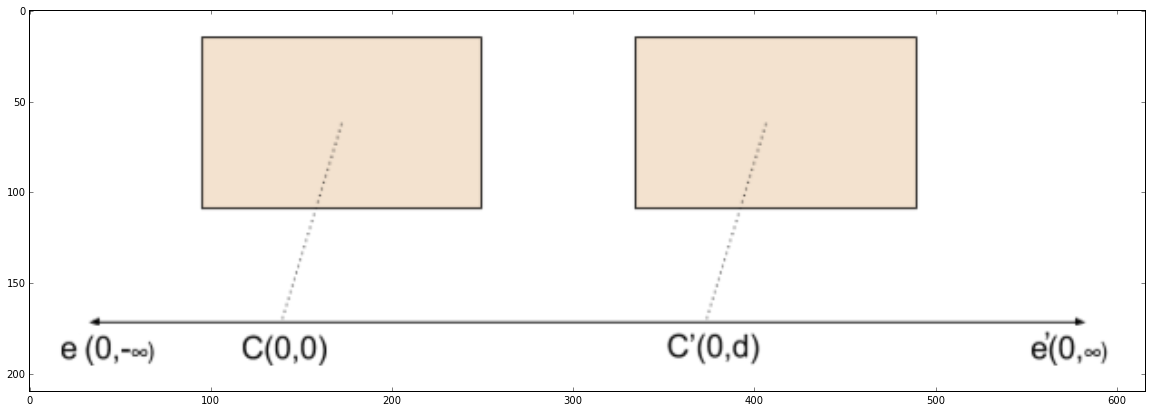

In [18]:
disp(cv2.imread('./part_d.png'))

#### e. Second camera rotated with a rotation matrix R

Reference:  
http://www1.cs.columbia.edu/~jebara/htmlpapers/SFM/node8.html
http://www.ee.oulu.fi/research/imag/courses/Sturm/moons09.pdf

When the second camera is only rotated with respect to the first, it means there will be no single line connecting the 2 camera centers, and hence, **there will be no baseline**. without a baseline, we cannot determine points which intersect the image planes. So, **the epipoles will be undefined** for this case. So, we cannot define a fundamental matrix or epipolar lines for this system.

Also (ref http://www.ee.oulu.fi/research/imag/courses/Sturm/moons09.pdf, pg 383), given the intrinsic matrix is identity, we will be able to obtain a homography matrix transformation (with only rotation component) between to map a scene point M's image points m1 and m2

ie. m2 = R.m1

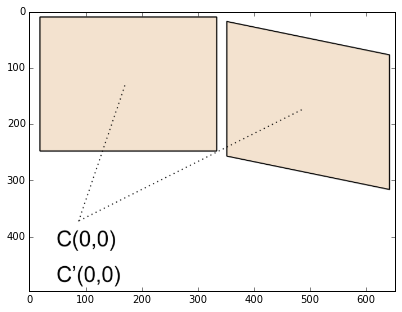

In [17]:
disp(cv2.imread('./part_e.png'),5,10)

### Question 3

#### a. Find matching interest points using SIFT or Harris

First we read in the images

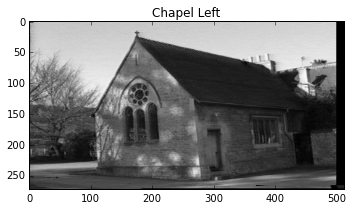

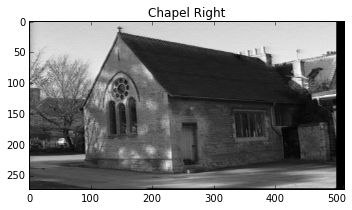

In [13]:
# first we read in the images
img1 = cv2.imread('./Files/chapel2.png',0)
img2 = cv2.imread('./Files/chapel1.png',0)
disp(img1,3,6,"Chapel Left")
disp(img2,3,6,"Chapel Right")

We use the SIFT Detector to identify keypoints in the left and right images

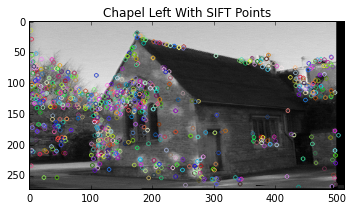

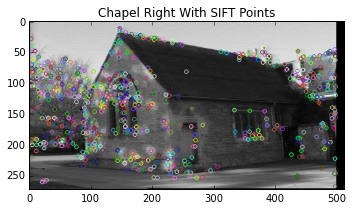

In [14]:
sift = cv2.SIFT()

kp1, des1 = sift.detectAndCompute(img1,None)
img1c = cv2.drawKeypoints(img1,kp1)
disp(img1c,3,6,"Chapel Left With SIFT Points")

kp2, des2 = sift.detectAndCompute(img2,None)
img2c = cv2.drawKeypoints(img2,kp2)
disp(img2c,3,6,"Chapel Right With SIFT Points")

We use the Brute Force Matcher to match the keypoints between the left and right images. We get a total of 461 matches

In [15]:
# we match using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)

print "Number of matches:", len(matches)

Number of matches: 463


#### b. Use the set of matched points you found to estimate the fundamental matrix F automatically using RANSAC and the normalized 8-point algorithm.

We use OpenCV's findFundamentalMat method to obtain the fundamental matrix using RANSAC. The underlying algorithm will be the 8-point algorithm.

**i. Indicate what test you used for deciding inlier vs. outlier.**

We use the param1 parameter in the findFundamentalMat method as the test. It is the maximum distance from a point to an epipolar line in pixels, beyond which the point is considered an outlier and is not used for computing the final fundamental matrix. We set it to a value of 3 as the epipolar lines should pass within around 1 pixel of the inlier points as per the problem statement. If we reduce it to lower than 3, we don't get enough inlier points in all the surfaces in the image and this results in an inaccurate fundamental matrix and consequently, inaccurate epipolar lines.

**ii. Display F after normalizing to unit length.**

In [16]:
pts1 = []
pts2 = []

for i,m in enumerate(matches):
    pts2.append(kp2[m.trainIdx].pt)
    pts1.append(kp1[m.queryIdx].pt)

pts1 = np.float32(pts1)
pts2 = np.float32(pts2)
F_prenorm, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_RANSAC,3)
print "Pre-Normalized Fundamental Matrix:\n\n",F_prenorm

F = F_prenorm/np.linalg.norm(F_prenorm)
print "\n\nNormalized Fundamental Matrix:\n\n",F

Pre-Normalized Fundamental Matrix:

[[ -6.70832358e-07  -2.01041064e-05   9.96680080e-03]
 [  8.09922509e-06   1.06504817e-05   1.28055730e-01]
 [ -7.81529520e-03  -1.26661976e-01   1.00000000e+00]]


Normalized Fundamental Matrix:

[[ -6.60157458e-07  -1.97841914e-05   9.80819993e-03]
 [  7.97034279e-06   1.04810015e-05   1.26017990e-01]
 [ -7.69093106e-03  -1.24646414e-01   9.84087082e-01]]


**iii. Plot the outliers with green dots on top of the first image.**

We plot the outliers in green and inliers in red for the first image

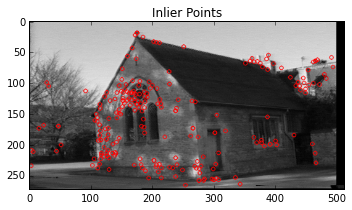

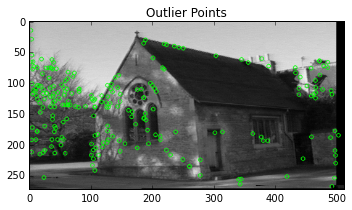

In [17]:
# We then store only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

# We also get the outlier points to display
outlier_kp1 = []
inlier_kp1 = []
for i, mv in enumerate(mask):
    match = matches[i]
    if(mv.ravel()==0):
        outlier_kp1.append(kp1[match.queryIdx])
    else:
        inlier_kp1.append(kp1[match.queryIdx])
        
img1o = cv2.drawKeypoints(img1,outlier_kp1,color=[0,255,0])
img1i = cv2.drawKeypoints(img1,inlier_kp1,color=[255,0,0])
disp(img1i,3,6,"Inlier Points")
disp(img1o,3,6,"Outlier Points")


#### c. Choose 7 sets of matching points that are well separated (can be randomly chosen). Plot the corresponding epipolar lines (in red) and the points (in green) on each image. Show the two images (with plotted points and lines) next to each other.

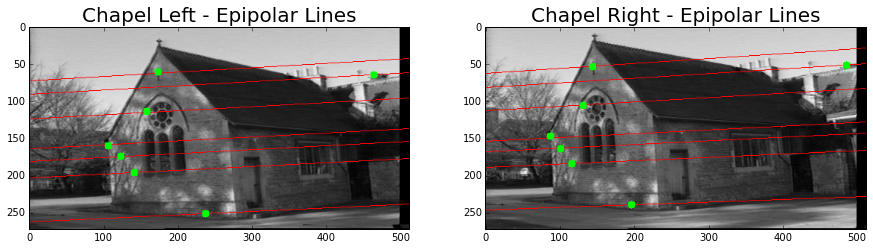

In [31]:
def drawlines(img_left_orig,img_right_orig,lines,pts1,pts2):
    r,c = img_left_orig.shape
    
    img_left = np.copy(img_left_orig)
    img_right = np.copy(img_right_orig)
    
    img_left = cv2.cvtColor(img_left_orig,cv2.COLOR_GRAY2BGR)
    img_right = cv2.cvtColor(img_right_orig,cv2.COLOR_GRAY2BGR)
    
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        cv2.line(img_left, (x0,y0), (x1,y1), [255,0,0],1)
        cv2.circle(img_left,tuple(pt1),5,[0,255,0],-1)
        cv2.circle(img_right,tuple(pt2),5,[0,255,0],-1)
        
    return img_left,img_right

# we choose the indices manually to ensure maximum separation between the epipolar lines
# sample_indices = [99, 83, 53, 131, 162,  0,  18]
sample_indices = np.random.random_integers(0,len(pts2)-1,7)

lines1 = cv2.computeCorrespondEpilines(pts2[sample_indices].reshape(-1,1,2), 2, F)
lines1 = lines1.reshape(-1,3)
img1e_1,img1e_2 = drawlines(img1,img2,lines1,pts1[sample_indices],pts2[sample_indices])
 
lines2 = cv2.computeCorrespondEpilines(pts1[sample_indices].reshape(-1,1,2), 1, F)
lines2 = lines2.reshape(-1,3)
img2e_1,img2e_2 = drawlines(img2,img1,lines2,pts2[sample_indices],pts1[sample_indices])

f, axes = plt.subplots(ncols=2, figsize=(15,15))
axes[0].imshow(img1e_1)
axes[0].set_title('Chapel Left - Epipolar Lines',fontsize=20)
axes[1].imshow(img2e_1)
axes[1].set_title('Chapel Right - Epipolar Lines',fontsize=20)
plt.show()